 # Aula 01 - Análise de Dados com Pandas

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [4]:
df.info

<bound method DataFrame.info of         work_year experience_level employment_type                 job_title  \
0          2025.0               SE              FT        Solutions Engineer   
1          2025.0               SE              FT        Solutions Engineer   
2          2025.0               MI              FT             Data Engineer   
3          2025.0               MI              FT             Data Engineer   
4          2025.0               EN              FT             Data Engineer   
...           ...              ...             ...                       ...   
133344     2020.0               SE              FT            Data Scientist   
133345     2021.0               MI              FT  Principal Data Scientist   
133346     2020.0               EN              FT            Data Scientist   
133347     2020.0               EN              CT     Business Data Analyst   
133348     2021.0               SE              FT            Data Scientist   

       

In [5]:
df.dtypes


work_year             float64
experience_level       object
employment_type        object
job_title              object
salary                  int64
salary_currency        object
salary_in_usd           int64
employee_residence     object
remote_ratio            int64
company_location       object
company_size           object
dtype: object

In [6]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [7]:
df.shape

(133349, 11)

In [8]:
# exibindo quantidade de linhas/colunas

linhas,colunas = df.shape[0],df.shape[1]
print("linhas:",linhas)
print("colunas:",colunas)

linhas: 133349
colunas: 11


In [9]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [11]:
# conversão das colunas para portugues


df.rename(columns={
    'work_year': 'Ano de Trabalho',
    'experience_level': 'Nível de Experiência',
    'employment_type': 'Tipo de Contratação',
    'job_title': 'Cargo',
    'salary': 'Salário',
    'salary_currency': 'moeda',
    'salary_in_usd': 'USD',
    'employee_residence': 'Residência ',
    'remote_ratio': ' Trabalho Remoto',
    'company_location': 'Localização da Empresa',
    'company_size': 'Porte da Empresa'
}, inplace=True)



In [12]:
df.head()

,Ano de Trabalho,Nível de Experiência,Tipo de Contratação,Cargo,Salário,moeda,USD,Residência,Trabalho Remoto,Localização da Empresa,Porte da Empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [13]:
df.columns

Index(['Ano de Trabalho', 'Nível de Experiência', 'Tipo de Contratação',
       'Cargo', 'Salário', 'moeda', 'USD', 'Residência ', ' Trabalho Remoto',
       'Localização da Empresa', 'Porte da Empresa'],
      dtype='object')

In [14]:
# verificando o resultado

print(df.head())

   Ano de Trabalho Nível de Experiência Tipo de Contratação  \
0           2025.0                   SE                  FT   
1           2025.0                   SE                  FT   
2           2025.0                   MI                  FT   
3           2025.0                   MI                  FT   
4           2025.0                   EN                  FT   

                Cargo  Salário moeda     USD Residência    Trabalho Remoto  \
0  Solutions Engineer   214000   USD  214000          US               100   
1  Solutions Engineer   136000   USD  136000          US               100   
2       Data Engineer   158800   USD  158800          AU                 0   
3       Data Engineer   139200   USD  139200          AU                 0   
4       Data Engineer    90000   USD   90000          US                 0   

  Localização da Empresa Porte da Empresa  
0                     US                M  
1                     US                M  
2                   

In [15]:
df["Nível de Experiência"].value_counts()

Nível de Experiência
SE    77241
MI    40465
EN    12443
EX     3200
Name: count, dtype: int64

EN → Entry Level (Iniciante)

MI → Mid Level (Pleno)

SE → Senior

EX → Executive (Diretoria / Gerência sênior)

In [16]:

# traduzindo as siglas da coluna nivel de experiencia

df["Nível de Experiência"] = df["Nível de Experiência"].replace({
    "EN": "Iniciante",
    "MI": "Pleno",
    "SE": "Sênior",
    "EX": "Executivo"
})

In [17]:
df["Tipo de Contratação"].value_counts()

Tipo de Contratação
FT    132563
CT       394
PT       376
FL        16
Name: count, dtype: int64

Sigla 

FT	---> Full Time	Tempo Integral
PT	---> Part Time	Meio Período
CT	---> Contract	Contrato
FL	---> Freelance	Freelancer / Autônomo

In [18]:

# traduzindo as siglas da coluna tipo de contratação


df["Tipo de Contratação"] = df["Tipo de Contratação"].replace({
    "FT": "Tempo Integral",
    "PT": "Meio Período",
    "CT": "Contrato",
    "FL": "Freelancer "
})

In [19]:
df[" Trabalho Remoto"].value_counts()

 Trabalho Remoto
0      105312
100     27718
50        319
Name: count, dtype: int64

numero o =  trabalhos presenciais
numero 100 =  trabalho remoto
numero 50 =  trabalho hibrido

In [20]:
# renomeando os valores da coluna " Trabalho Remoto" para tipos de trabalho remoto

df["Tipo de Trabalho Remoto"] = df[" Trabalho Remoto"].replace({
    0: "Presencial",
    50: "Híbrido",
    100: "Remoto"
})

In [21]:
df["Porte da Empresa"].value_counts()

Porte da Empresa
M    129561
L      3574
S       214
Name: count, dtype: int64

In [22]:
# renomeando as siglas da coluna "Porte da Empresa"
df["Porte da Empresa"] = df["Porte da Empresa"].replace({
    "M": "Média",
    "L": "Grande",
    "S": "Pequena"
})

 m = empresas medias
 l = empresas grandes
 s = empresas pequenas

In [23]:
df.head()

,Ano de Trabalho,Nível de Experiência,Tipo de Contratação,Cargo,Salário,moeda,USD,Residência,Trabalho Remoto,Localização da Empresa,Porte da Empresa,Tipo de Trabalho Remoto
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,100,US,Média,Remoto
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,100,US,Média,Remoto
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,0,AU,Média,Presencial
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,0,AU,Média,Presencial
4,2025.0,Iniciante,Tempo Integral,Data Engineer,90000,USD,90000,US,0,US,Média,Presencial


In [24]:
df.describe(include=object)

,Nível de Experiência,Tipo de Contratação,Cargo,moeda,Residência,Localização da Empresa,Porte da Empresa,Tipo de Trabalho Remoto
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,95,3,3
top,Sênior,Tempo Integral,Data Scientist,USD,US,US,Média,Presencial
freq,77241,132563,17314,126140,119579,119641,129561,105312


In [25]:
df.describe()

,Ano de Trabalho,Salário,USD,Trabalho Remoto
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


# Aula 02 Preparação e Limpeza dos Dados

In [26]:
df.isnull()

,Ano de Trabalho,Nível de Experiência,Tipo de Contratação,Cargo,Salário,moeda,USD,Residência,Trabalho Remoto,Localização da Empresa,Porte da Empresa,Tipo de Trabalho Remoto
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
df.isnull().sum() # verificando valores nulos

Ano de Trabalho            10
Nível de Experiência        0
Tipo de Contratação         0
Cargo                       0
Salário                     0
moeda                       0
USD                         0
Residência                  0
 Trabalho Remoto            0
Localização da Empresa      0
Porte da Empresa            0
Tipo de Trabalho Remoto     0
dtype: int64

In [28]:
df["Ano de Trabalho"].unique() # verificando dentro da coluna ANO DE TRABALHO quais sao os anos nulos

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [29]:
df[df.isnull().any(axis=1)] # trazendo as linhas nulas

,Ano de Trabalho,Nível de Experiência,Tipo de Contratação,Cargo,Salário,moeda,USD,Residência,Trabalho Remoto,Localização da Empresa,Porte da Empresa,Tipo de Trabalho Remoto
5588,NaN,Sênior,Tempo Integral,Product Manager,184500,USD,184500,US,0,US,Média,Presencial
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,0,DE,Média,Presencial
59710,NaN,Iniciante,Tempo Integral,Data Scientist,208800,USD,208800,US,0,US,Média,Presencial
59759,NaN,Sênior,Tempo Integral,Software Engineer,135000,USD,135000,US,0,US,Média,Presencial
59789,NaN,Sênior,Tempo Integral,Engineer,112000,USD,112000,US,0,US,Média,Presencial
131000,NaN,Sênior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,0,US,Média,Presencial
131006,NaN,Sênior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,0,US,Média,Presencial
133054,NaN,Iniciante,Tempo Integral,Data Scientist,40000,USD,40000,JP,100,MY,Grande,Remoto
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,100,PL,Grande,Remoto
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,50,US,Grande,Híbrido


# Exemplos fictícios

In [30]:
# criando um dataframe para avaliar media e mediana de salarios para preencher os valores nulos apenas pra teste
import numpy as np
df_salarios = pd.DataFrame({
    'Nome':["Ana","Bruna","Carlos","Daniele","Val"],
    'Salario': [4000,np.nan,5000,np.nan,100000]  # np.nan indica valores nulos
})
# calcula a media e mediana  e substitui os nulos e arredonda
df_salarios['salario_media'] = df_salarios["Salario"].fillna(df_salarios["Salario"].mean().round(2))
df_salarios['salario_mediana'] = df_salarios["Salario"].fillna(df_salarios["Salario"].median())




In [31]:
df_salarios

,Nome,Salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruna,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [32]:
df_temperatura = pd.DataFrame({
    "Dia": ["Segunda","Terça","Quarta","Quinta","Sexta"],
    "Temperatura":[30,np.nan,np.nan,28,27]
})

df_temperatura['preenchido_ffill'] = df_temperatura["Temperatura"].ffill()     # ffill completa valores nulos com valores anteriores desde que nao seja nulos


df_temperatura


,Dia,Temperatura,preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [33]:
df_temperatura = pd.DataFrame({
    "Dia": ["Segunda","Terça","Quarta","Quinta","Sexta"],
    "Temperatura":[30,np.nan,np.nan,28,27]
})

df_temperatura['preenchido_bfill'] = df_temperatura["Temperatura"].bfill()    # bfill completa com valores posteriores  ao contrario de ffill


df_temperatura

,Dia,Temperatura,preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [34]:
# Exemplo de preenchimento com valor fixo

df_cidades = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Diana', 'Eduardo'],
    'cidade': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Salvador']
})

df_cidades['cidade_corrigida'] = df_cidades['cidade'].fillna('Não informado')

df_cidades
     




,nome,cidade,cidade_corrigida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Diana,NaN,Não informado
4,Eduardo,Salvador,Salvador


# Estratégia	                             Quando usar
Imputação inteligente	                     Quando os dados faltantes são significativos para a análise
Remoção de linhas	                         Quando o volume de nulos é pequeno e não afeta o dataset
Preenchimento baseado em regra	             Quando há lógica ou negócio claro para inferir o valor


# Tratando o nosso DataFrame
 - Removendo os dados nulos
 - Remoção das linhas com anos nulos:

In [35]:
df_limpo = df.dropna()

In [36]:
df_limpo.isnull().sum()

Ano de Trabalho            0
Nível de Experiência       0
Tipo de Contratação        0
Cargo                      0
Salário                    0
moeda                      0
USD                        0
Residência                 0
 Trabalho Remoto           0
Localização da Empresa     0
Porte da Empresa           0
Tipo de Trabalho Remoto    0
dtype: int64

In [37]:
df_limpo.head()

,Ano de Trabalho,Nível de Experiência,Tipo de Contratação,Cargo,Salário,moeda,USD,Residência,Trabalho Remoto,Localização da Empresa,Porte da Empresa,Tipo de Trabalho Remoto
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,100,US,Média,Remoto
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,100,US,Média,Remoto
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,0,AU,Média,Presencial
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,0,AU,Média,Presencial
4,2025.0,Iniciante,Tempo Integral,Data Engineer,90000,USD,90000,US,0,US,Média,Presencial


In [38]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Ano de Trabalho          133339 non-null  float64
 1   Nível de Experiência     133339 non-null  object 
 2   Tipo de Contratação      133339 non-null  object 
 3   Cargo                    133339 non-null  object 
 4   Salário                  133339 non-null  int64  
 5   moeda                    133339 non-null  object 
 6   USD                      133339 non-null  int64  
 7   Residência               133339 non-null  object 
 8    Trabalho Remoto         133339 non-null  int64  
 9   Localização da Empresa   133339 non-null  object 
 10  Porte da Empresa         133339 non-null  object 
 11  Tipo de Trabalho Remoto  133339 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 13.2+ MB


In [39]:
df_limpo = df_limpo.assign(
    **{'Ano de Trabalho': df_limpo['Ano de Trabalho'].astype('int64')}  # convertendo a coluna ano pra int
)


# Aula 3 - Visualização de Dados
Aprendendo a criar gráficos estatísticos para explorar e comunicar informações presentes nos dados. Histogramas, boxplots, barras, etc.

In [40]:
df_limpo.head()

,Ano de Trabalho,Nível de Experiência,Tipo de Contratação,Cargo,Salário,moeda,USD,Residência,Trabalho Remoto,Localização da Empresa,Porte da Empresa,Tipo de Trabalho Remoto
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,100,US,Média,Remoto
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,100,US,Média,Remoto
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,0,AU,Média,Presencial
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,0,AU,Média,Presencial
4,2025,Iniciante,Tempo Integral,Data Engineer,90000,USD,90000,US,0,US,Média,Presencial


<Axes: title={'center': 'Destibuição de Senioridade'}, xlabel='Nível de Experiência'>

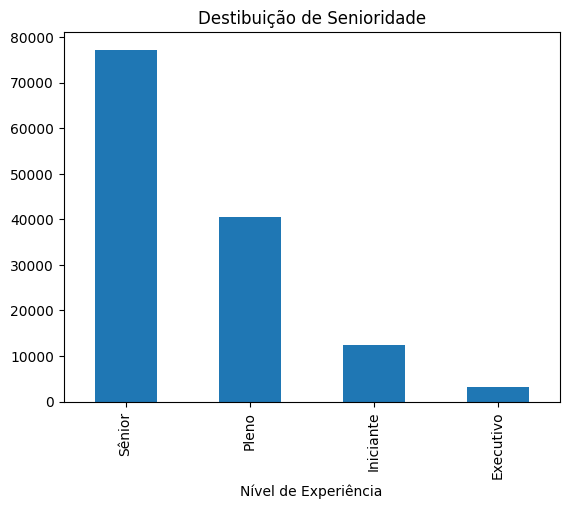

In [41]:
# contando o nivel de experiencia

df_limpo["Nível de Experiência"].value_counts().plot(kind='bar',title = "Destibuição de Senioridade")

No gráfico acima observa-se  que, no futuro, a empresa podera ter problemas .A empresa tem  mais que o dobro de profissionais seniores em comparação a outros níveis, é importante refletir: será que a organização conseguirá manter essa estrutura a longo prazo? Além disso, a empresa está investindo no desenvolvimento e na formação de novos talentos para garantir a sustentabilidade e o equilíbrio da equipe?

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Nível de Experiência', ylabel='USD'>

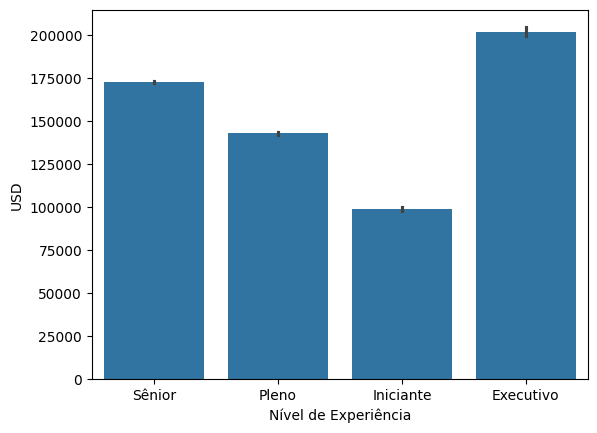

In [43]:
sns.barplot(data=df_limpo, x="Nível de Experiência", y="USD")


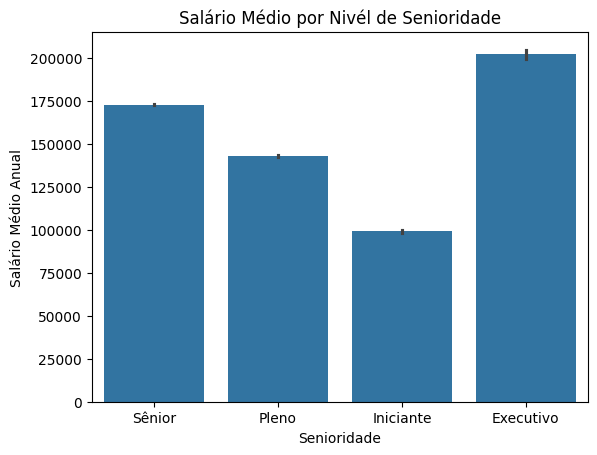

In [44]:
plt.Figure(figsize=(8,5))
sns.barplot(data=df_limpo, x="Nível de Experiência", y="USD")
plt.title("Salário Médio por Nivél de Senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário Médio Anual")
plt.show()

In [45]:
df_limpo.groupby("Nível de Experiência")["USD"].mean().sort_values(ascending=False) # ordenando os salarios anuais do maior para o menor

Nível de Experiência
Executivo    202027.667813
Sênior       172850.838301
Pleno        143044.845979
Iniciante     99034.963267
Name: USD, dtype: float64

In [46]:
ordem = df_limpo.groupby("Nível de Experiência")["USD"].mean().sort_values(ascending=False).index  # criando uma variavel

In [47]:
ordem  # variavel 

Index(['Executivo', 'Sênior', 'Pleno', 'Iniciante'], dtype='object', name='Nível de Experiência')

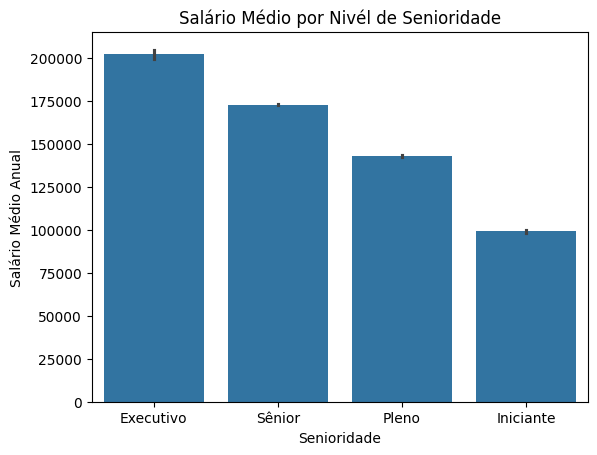

In [48]:
plt.Figure(figsize=(8,5))
sns.barplot(data=df_limpo, x="Nível de Experiência", y="USD",order=ordem)
plt.title("Salário Médio por Nivél de Senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário Médio Anual")
plt.show()

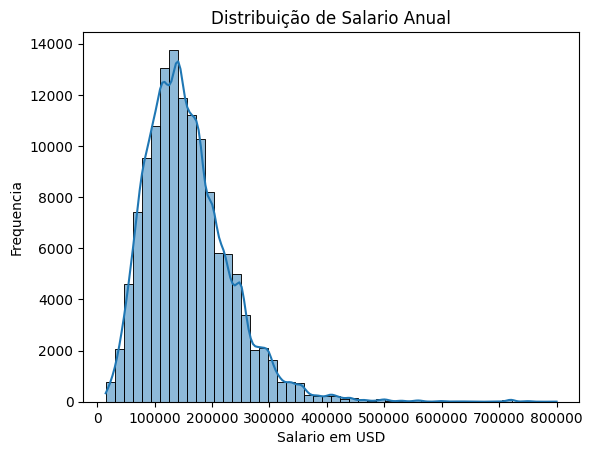

In [49]:
plt.Figure(figsize=(8,4))
sns.histplot(df_limpo['USD'],bins=50,kde=True)
plt.title("Distribuição de Salario Anual")
plt.xlabel("Salario em USD")
plt.ylabel("Frequencia")
plt.show()


"Observamos que a maioria dos salários anuais está concentrada na faixa entre R$150 mil e R$200 mil, com poucos profissionais recebendo valores significativamente mais altos. Essa distribuição evidencia uma concentração salarial nas faixas inferiores, indicando uma assimetria na remuneração dentro da empresa ou setor analisado."



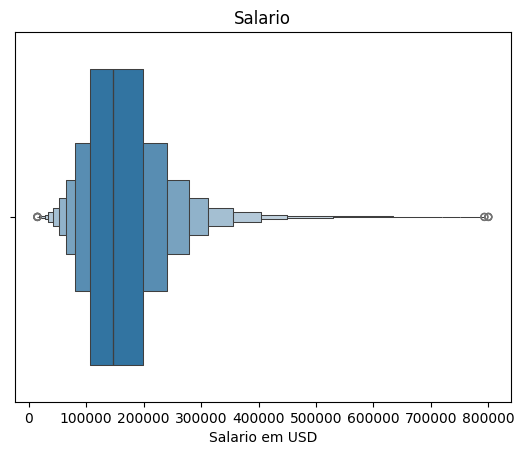

In [50]:
plt.Figure(figsize=(8,5))
sns.boxenplot(x = df_limpo['USD'])
plt.title("Salario")
plt.xlabel("Salario em USD")

plt.show()


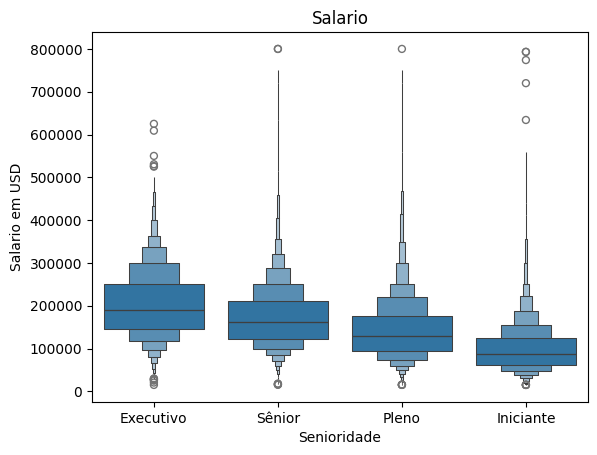

In [51]:
ordem_senioridade = [
    'Executivo',
    'Sênior',
    'Pleno',
    'Iniciante'
]

plt.Figure(figsize=(8,5))
sns.boxenplot(x='Nível de Experiência', y='USD', data=df_limpo, order=ordem_senioridade)
plt.title("Salario")
plt.xlabel("Senioridade")
plt.ylabel("Salario em USD")
plt.show()

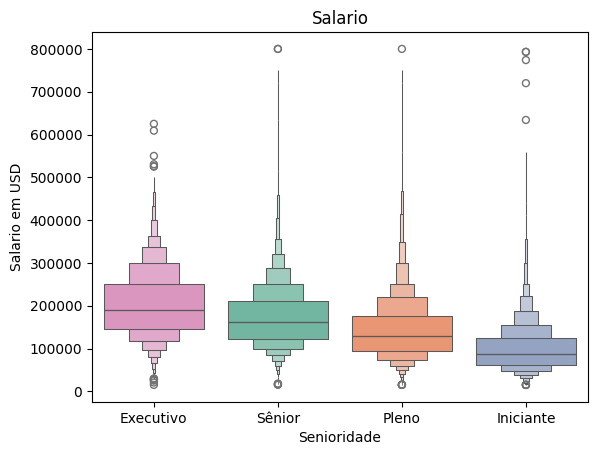

In [52]:
ordem_senioridade = [
    'Executivo',
    'Sênior',
    'Pleno',
    'Iniciante'
]

plt.Figure(figsize=(8,5))
sns.boxenplot(x='Nível de Experiência', y='USD', data=df_limpo, order=ordem_senioridade, palette="Set2", hue= "Nível de Experiência")
plt.title("Salario")
plt.xlabel("Senioridade")
plt.ylabel("Salario em USD")
plt.show()

In [53]:
import plotly.express as px

In [54]:
print(df_limpo.columns.tolist())

['Ano de Trabalho', 'Nível de Experiência', 'Tipo de Contratação', 'Cargo', 'Salário', 'moeda', 'USD', 'Residência ', ' Trabalho Remoto', 'Localização da Empresa', 'Porte da Empresa', 'Tipo de Trabalho Remoto']


In [55]:

senioridade_media_salario = df_limpo.groupby('Nível de Experiência')['USD'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario,
             x='Nível de Experiência',
             y='USD',
             title='Média Salarial por Senioridade',
             labels={'Nível de Experiência': 'Nível de Senioridade', 'usd': 'Média Salarial Anual (USD)'})

fig.show()

In [56]:
remoto_contagem = df_limpo['Nível de Experiência'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
          )

fig.update_traces(textinfo='percent+label')
fig.show()
     


In [57]:
df_limpo.head()

,Ano de Trabalho,Nível de Experiência,Tipo de Contratação,Cargo,Salário,moeda,USD,Residência,Trabalho Remoto,Localização da Empresa,Porte da Empresa,Tipo de Trabalho Remoto
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,100,US,Média,Remoto
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,100,US,Média,Remoto
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,0,AU,Média,Presencial
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,0,AU,Média,Presencial
4,2025,Iniciante,Tempo Integral,Data Engineer,90000,USD,90000,US,0,US,Média,Presencial


In [58]:

# Corrigir nomes das colunas com espaços extras
df_limpo.columns = df_limpo.columns.str.strip()

# Filtrar apenas os Data Engineers
df_data_engineer = df_limpo[df_limpo['Cargo'] == 'Data Engineer']

# Calcular salário médio por país de residência
salario_por_pais = df_data_engineer.groupby('Residência')['USD'].mean().reset_index()

# Ordenar do maior para o menor
salario_por_pais = salario_por_pais.sort_values(by='USD', ascending=False)

# Criar o gráfico moderno
fig = px.bar(
    salario_por_pais,
    x='USD',
    y='Residência',
    orientation='h',
    color='USD',
    color_continuous_scale='viridis',
    title='💰 Salário Médio por País | Cargo: Data Engineer',
    labels={'Residência': 'País', 'USD': 'Salário Médio (USD)'}
)

fig.update_layout(
    xaxis_tickprefix="$",
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(size=14),
    title_font=dict(size=20),
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=False)
)

fig.show()


In [60]:

# Corrigir nomes das colunas com espaços extras
df_limpo.columns = df_limpo.columns.str.strip()

# Filtrar apenas os Data Engineers
df_data_engineer = df_limpo[df_limpo['Cargo'] == 'Data Engineer']

# Calcular salário médio por país de residência
salario_por_pais = df_data_engineer.groupby('Residência')['USD'].mean().reset_index()

# Ordenar do maior para o menor
salario_por_pais = salario_por_pais.sort_values(by='USD', ascending=False)

# OPCIONAL: Mostrar apenas os 10 primeiros países
salario_por_pais = salario_por_pais.head(10)

# Criar gráfico com paleta suave
fig = px.bar(
    salario_por_pais,
    x='USD',
    y='Residência',
    orientation='h',
    color='USD',
    color_continuous_scale='mint',  # Cor mais suave
    title='💰 Salário Médio por País | Cargo: Data Engineer',
    labels={'Residência': 'País', 'USD': 'Salário Médio (USD)'}
  
)

# Layout
fig.update_layout(
    height=600,
    xaxis_tickprefix="$",
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(size=14),
    title_font=dict(size=20),
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=False)
)

fig.show()
